### Import Dependencies

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Input Dataset

In [10]:
df = pd.read_csv('flower.csv')

## Data Exploration

### Check data rows

In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,4
4,5.0,3.6,1.4,0.2,0,5
5,5.4,3.9,1.7,0.4,0,6
6,4.6,3.4,1.4,0.3,0,7
7,5.0,3.4,1.5,0.2,0,8
8,4.4,2.9,1.4,0.2,0,9
9,4.9,3.1,1.5,0.1,0,10


### Describe data

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,75.500000
std,0.828066,0.433594,1.764420,0.763161,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,38.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,75.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,112.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,150.000000


<Axes: xlabel='Species', ylabel='count'>

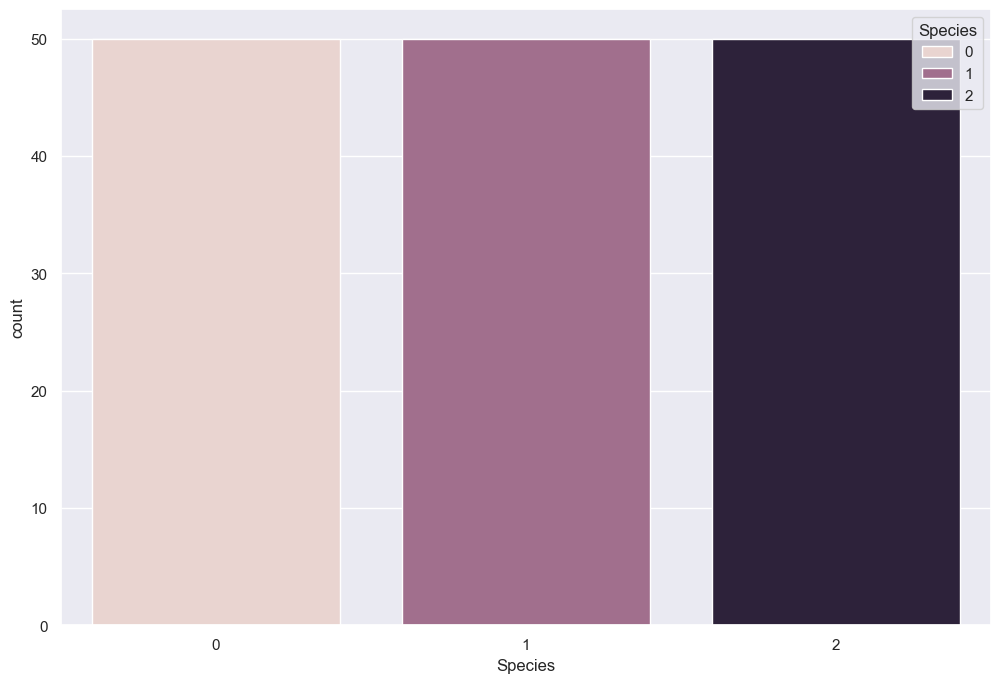

In [16]:
sns.countplot (x='Species', data=df, hue="Species")

## Boxplot of the species to find the outliers if any

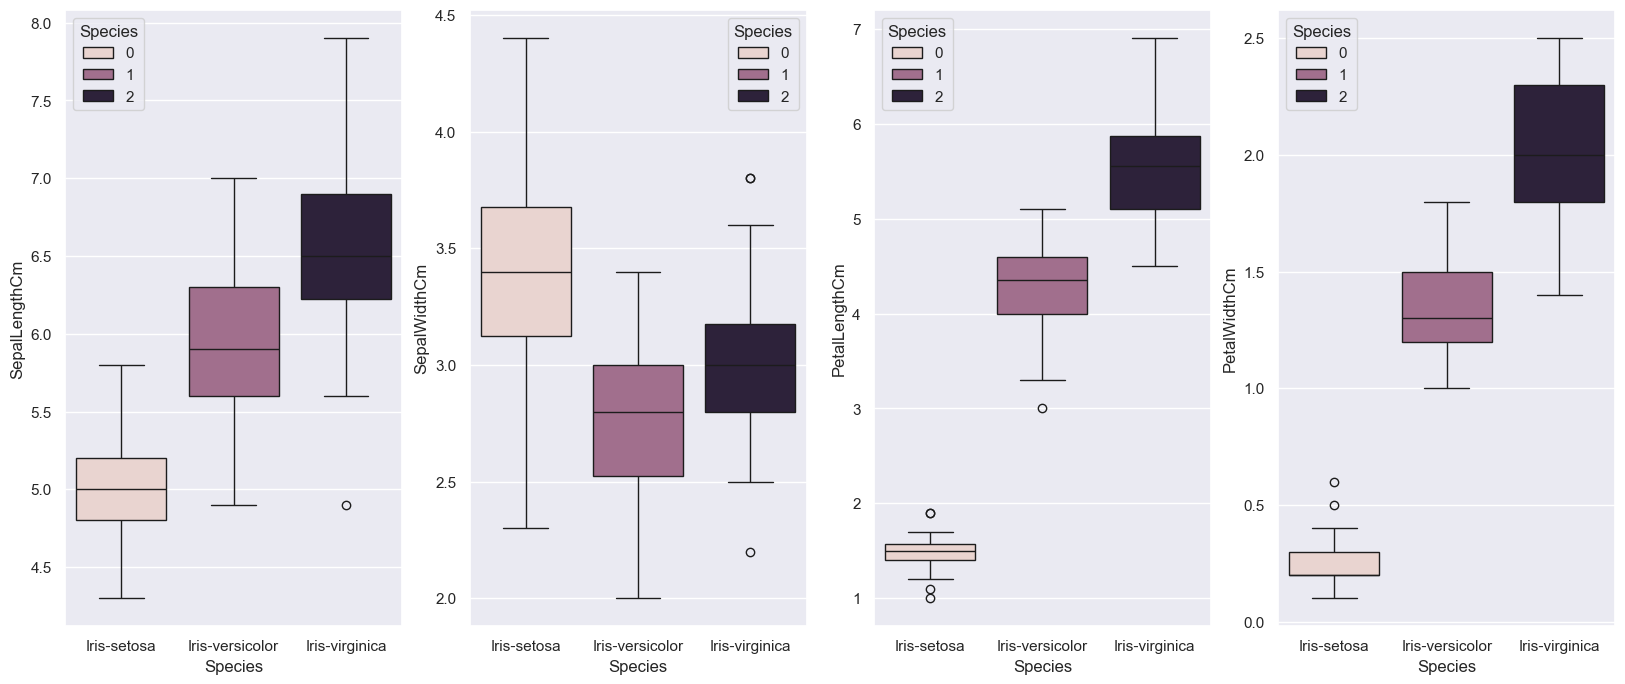

In [19]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.boxplot(x='Species',y='SepalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(142)
sns.boxplot(x='Species',y='SepalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(143)
sns.boxplot(x='Species',y='PetalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(144)
sns.boxplot(x='Species',y='PetalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

plt.show()



## Plotting of the Correlation Matrix

In [20]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561,0.716676
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.397729
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043,0.882747
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464,0.899759
Species,0.782561,-0.419446,0.949043,0.956464,1.000000,0.942830
Id,0.716676,-0.397729,0.882747,0.899759,0.942830,1.000000


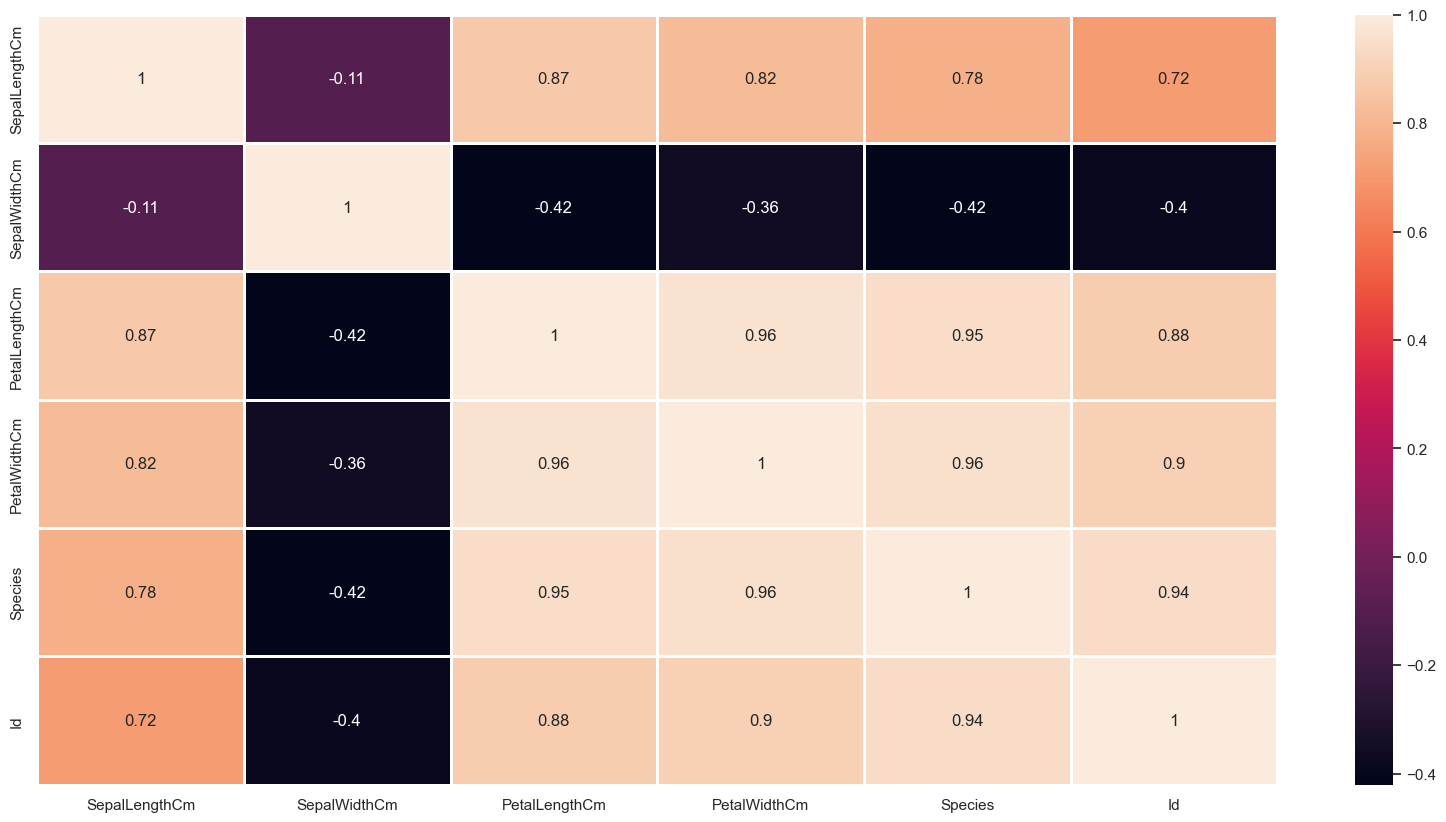

In [24]:
plt.figure(1,figsize=(20,10))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, linewidth=0.8)
plt.show()

put heading here

In [25]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(A)->0,  2(P)->1, 3(C)->2
idx_A = np.where(y == 0)
idx_B = np.where(y == 1)
idx_C = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A (0)')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B (1)')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='b', label='C (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

NameError: name 'y' is not defined